In [2]:
import numpy as np
from scipy import signal
import pydicom as dicom
from matplotlib import image
import matplotlib.pyplot as plt
import os
import cv2

## Import Images 

In [3]:
from pydicom import dcmread

In [4]:
#Import 2 images
fpath1 = '/Users/sevdeetoz/Jupyter/HCM/Optical Flow/IM-0133-0001.dcm'
fpath2 = '/Users/sevdeetoz/Jupyter/HCM/Optical Flow/IM-0133-0010.dcm'
I1 = dcmread(fpath1)
I2 = dcmread(fpath2)

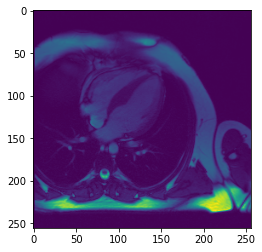

In [5]:
# Load dimensions based on the number of rows, columns.
#ConstPixelDims = (int(I1.Rows), int(I1.Columns), len(lstFilesDCM))
ConstPixelDims = (int(I1.Rows), int(I1.Columns))
I1g = np.zeros(ConstPixelDims, dtype=I1.pixel_array.dtype)
I1g[:, :] = I1.pixel_array

I2g = np.zeros(ConstPixelDims, dtype=I2.pixel_array.dtype)
I2g[:, :] = I2.pixel_array
plt.imshow(I1g)

In [8]:
I1g.shape, type(I1g)

((256, 256), numpy.ndarray)

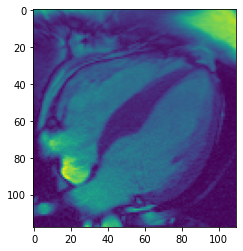

In [5]:
## Cut edges of the image
I1c = I1g[44:162,52:162]
I2c = I2g[44:162,52:162]
plt.imshow(I1c)

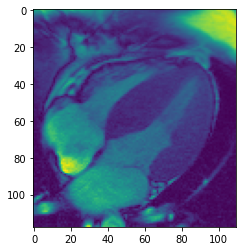

In [6]:
plt.imshow(I2c)

## Calculate Flow
### source1: https://github.com/IRailean/Dense-Optical-Flow/blob/master/OpticalFlow.py

### source2: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html


In [29]:
flow = cv2.calcOpticalFlowFarneback(I1c, I2c,None, pyr_scale = 0.3, levels = 50, winsize = 11, iterations = 15, poly_n = 5, poly_sigma = 1.1, flags = 0)

flow.shape

(118, 110, 2)

In [30]:
# Create mask
mask = np.zeros_like(I1c)
# Sets image saturation to maximum
mask[..., 1] = 255
mask.shape

(118, 110)

In [31]:
# Compute the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
angle.shape

(118, 110)

In [16]:
# Set image hue according to the optical flow direction
mask[..., 0] = angle * 180 / np.pi / 2
# Set image value according to the optical flow magnitude (normalized)
mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# Convert HSV to RGB (BGR) color representation
rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

ValueError: could not broadcast input array from shape (118,110) into shape (118)

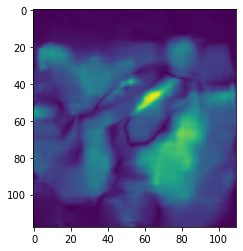

In [32]:
# Compute the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[:,:, 0], flow[:,:, 1])
plt.imshow(magnitude)

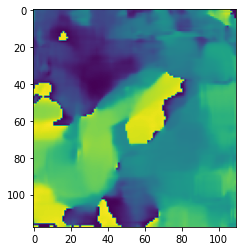

In [35]:
plt.imshow(angle)